# Ejercicio de regresión con múltiples características
###**Integrantes**
- Daniel Méndez Díaz
- Juan David Godoy
- Johan Ramos Duarte

###**Docente**
- Edwin Niño

## Librerías

In [ ]:
%load_ext google.colab.data_table

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## Conjunto de datos
---
1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.


In [ ]:
!wget https://www.dropbox.com/s/h0l50i674l868xe/housing.csv?dl=0
data = pd.read_csv('housing.csv?dl=0', sep=';')
data = data[~data['MEDV'].isna()]
data

--2024-05-29 18:08:40--  https://www.dropbox.com/s/h0l50i674l868xe/housing.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/h0l50i674l868xe/housing.csv [following]
--2024-05-29 18:08:40--  https://www.dropbox.com/s/raw/h0l50i674l868xe/housing.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc428a20444b9e3d2d6518702962.dl.dropboxusercontent.com/cd/0/inline/CT08WQzA9eAn8Oci0atan_9RimVNk9l_2X_JEQydCWrEyk2GpQHPih5cvyTHADQSMPf7X4CbL42ijj41429vcspdBjtLF82nTyQWK2DDvdpl1IcSA8drm6NrVsZ8dwLcssfcIMUhPUVfPqI9YR1b6C-J/file# [following]
--2024-05-29 18:08:41--  https://uc428a20444b9e3d2d6518702962.dl.dropboxusercontent.com/cd/0/inline/CT08WQzA9eAn8Oci0atan_9RimVNk9l_2X_JEQydCWrEyk2GpQHPih5cvyTHADQSMPf7X4CbL42ijj41429vcspdBjtLF82nTy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,65.75,65.2,40.900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,64.21,78.9,49.671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,71.85,61.1,49.671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,69.98,45.8,60.622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,71.47,54.2,60.622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,65.93,69.1,24.786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,61.20,76.7,22.875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,69.76,91.0,21.675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,67.94,89.3,23.889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
X = data.copy()
del X['MEDV']
y = pd.Series(data['MEDV'])

print(y.describe())
print(X.describe())

count    452.000000
mean      23.750442
std        8.808602
min        6.300000
25%       18.500000
50%       21.950000
75%       26.600000
max       50.000000
Name: MEDV, dtype: float64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean   128.007585   12.721239   10.304889    0.077434    0.540816   63.435376   
std    255.953815   24.326032    6.797103    0.267574    0.113816    6.668075   
min      0.006320    0.000000    0.460000    0.000000    0.385000   35.610000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000   59.267500   
50%      0.191030    0.000000    8.140000    0.000000    0.519000   62.290000   
75%    121.146000   20.000000   18.100000    0.000000    0.605000   66.350000   
max    996.654000  100.000000   27.740000    1.000000    0.871000   87.800000   

              AGE         DIS         RAD         TAX      PRATIO           B  \
co

## Analizar correlación
Tarea: Calcular la matriz de correlación entre las características y la variable dependiente. Analizar resultado.

Para la variable CRIM se visualiza que esta tiene correlación fuerte con respecto a las otras variables, afectando negativamente las mayorías de estas; como por ejemplo el tamño de la zona, la distancia del centro, B y el valor de la casa, indicando que entre mayor sea este valor de criminalidad, disminuyen estos valores. Para un contexto general indican que en zonas de escasos recursos o zonas alejadas de la ciudad hay un mayor indice de criminalidad que en otraz zonas.
Para variables como NOX, RAD y LSTAT son positivas en relación a la criminalidad indicando que entre un mayor indice de criminalidad, variables como aire y salidas de zonas y el status de las personas aumentan.

Para la variable ZN no tiene una importancia que afecten o aumenten algunas variables, tiene una correlación con DIS indicando que entre mas grande sea la zona, mas alejada esta del centro de la ciudad.

Para la variable INDIUS tiene una correlación con algunas variables; como por ejemplo NOX, DIS y el valor de la casa, indicandp que un mayor ingreso, mejor es la calidad del aire, es mas alejada del centro de la ciudad y los valores de la casa aumentan, indicando zonas seguras o zonas de estatus alto.

La variable chas tiene una correlación respecto a la calidad del aire y la edad, mostrando que entre mas cerca del aire, mejora minimamente la calidad del aire y aumenta la calidad de vida

Para la variable NOX se relaciona a variables como la edad, RAD y TAX dando a entender que entre mejor sea la calidad del aire, mejor es la calidad de vida y las casas tienen mejores accesos aumentando su valor.

Para RM se tiene una correlacion con el valor de la casa, indicando que entre mas habitaciones tenga la casa, aumenta el valor de la casa.

La edad tiene una relación respecto a la distancia y esta indica que entre mas alejada sea la zona del centro menor es la calidad de vida, tambien tiene una relación con TAX indicando que entre mayor sea la persona tiene mejores precios respecto a las propiedades que tenga

La variable distancia tiene correlaciones pequeñas respecto a las demás variables que no se han indicado, teniendo así las correlaciones de distancia que se han indicado anteriormente.

La variable RAD tiene una correlacion con respecto a TAX, sugiere que entre mayor sea el valor de la propiedad, tiene un mejor acceso a vías principales.

La variable TAX tiene correlación con las variablres PRATIO y valor de la casa, indicando que entre mayor sea el indice de TAX, hay mas alumnos y profesores pero los precios de la disminuyen.

La variable PRATIO tiene una correlación con LSTAT y el valor de la casa, mostrando que entre mas alumnos y profesores hayan menor indice de poblacion hay disminuyendo los precios de la casa

La variable de B no tiene correlaciones importantes respecto a todas las variables diferentes a las mencioandas anteriormente.

La variable de LSTAT tiene relación respecto al valor de la casa y entre mayor sea este indice, el valor de la casa disminuye.

In [ ]:
df = X.copy()
df['house_val'] = y
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,house_val
CRIM,1.000000,-0.261949,0.570437,0.050095,0.625670,-0.143513,0.427256,-0.444837,0.897104,0.827015,0.310070,-0.412939,0.413438,-0.283424
ZN,-0.261949,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.570437,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050095,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.625670,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.143513,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.427256,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.444837,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897104,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.827015,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


## Visualización por pares
Tarea: Graficar la relación entre las variables por parejas. Analizar resultado.

###**Analisis de la visualización por pares**
Se visualiza una matriz de graficos, la cual muestra una relación entre dos variables.
- Se observa que la diagonal se muestra un histograma por cada variable de forma individual y con ello se puede ver su distribución, si tiene sesgos o es una distribución normal.
- Los que están fuera de la diagonal muestra como se relacionan las variables diferentes por pares, donde es posible evidenciar patrones lineales, no lineales y valores atipicos.

###**Algunas caracteristicas notables**


- **RM y House_val**

  Hay una fuerte concentración de puntos en el grafico y esto se debe a que hay una fuerte correlación de los datos, lo cual sugiere que a medida que aumenta kas habitaciones, el valor de la casa también aumenta



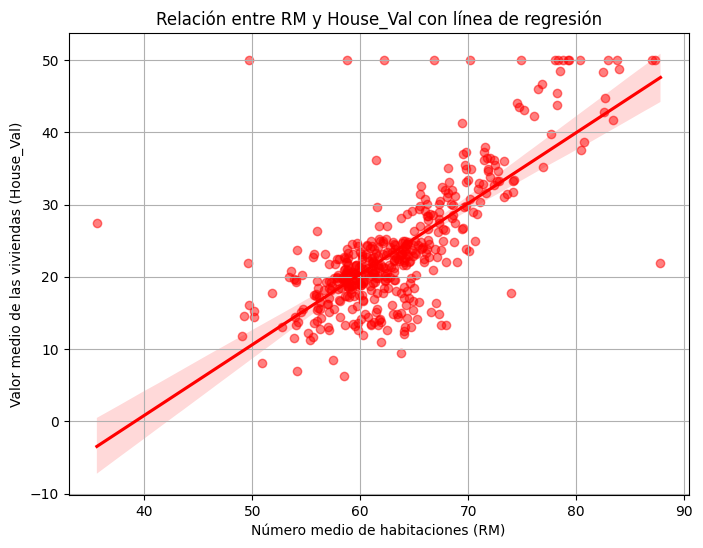

In [ ]:
# Graficar la relación entre RM y House_Val con una línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='RM', y='house_val', data=df, color='red', scatter_kws={'alpha':0.5})
plt.title('Relación entre RM y House_Val con línea de regresión')
plt.xlabel('Número medio de habitaciones (RM)')
plt.ylabel('Valor medio de las viviendas (House_Val)')
plt.grid(True)
plt.show()

- **LSTAT y House_Val**

  Exites una correlación negativa furte y se evidencia en el grafico, pues muestra los puntos muy juntos, y se podría deber a que a medidad que el procentaje de la población más bajo aumenta, el valor de las casas disminuye.

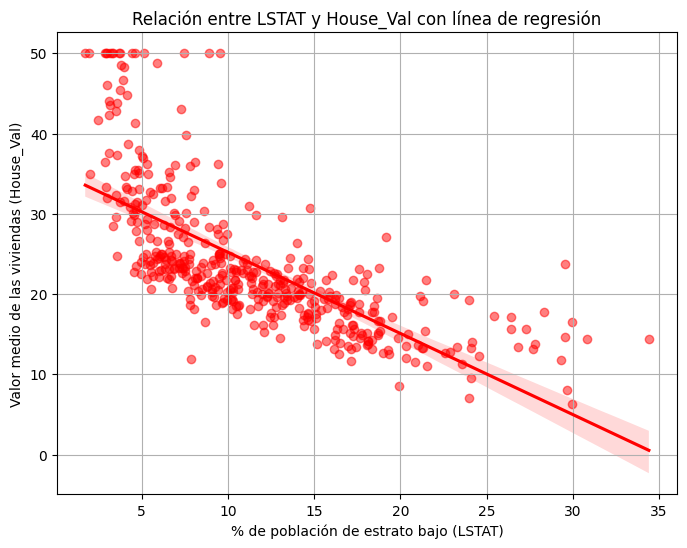

In [ ]:
# Graficar la relación entre LSTAT y House_Val con una línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='LSTAT', y='house_val', data=df, color='red', scatter_kws={'alpha':0.5})
plt.title('Relación entre LSTAT y House_Val con línea de regresión')
plt.xlabel('% de población de estrato bajo (LSTAT)')
plt.ylabel('Valor medio de las viviendas (House_Val)')
plt.grid(True)
plt.show()

- **Nox - Dis**

  Existe una relación negativa fuerte, se evidencia un grafico, con un  patrón pronunciado, tiende a ser exponcial y se podría explicar a que a medida que que la concentración de óxidos nítricos en una zona aumenta, las distancias ponderadas a los centros de empleo disminuyen, y viceversa.

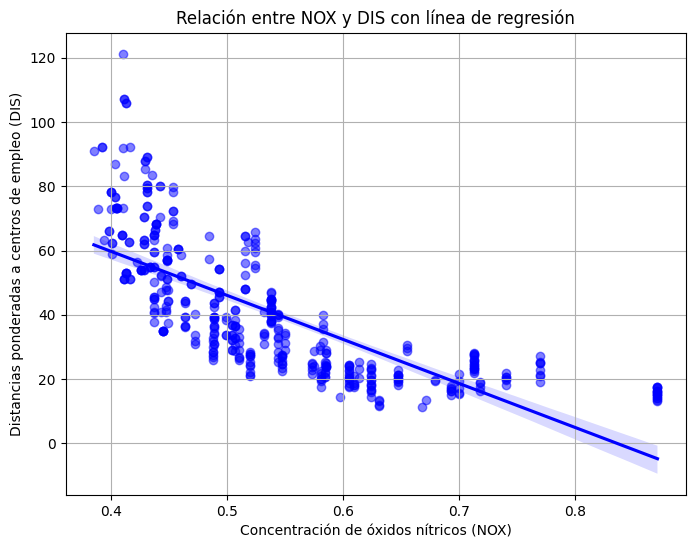

In [ ]:
# Graficar la relación entre NOX y DIS con una línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='NOX', y='DIS', data=df, color='blue', scatter_kws={'alpha':0.5})
plt.title('Relación entre NOX y DIS con línea de regresión')
plt.xlabel('Concentración de óxidos nítricos (NOX)')
plt.ylabel('Distancias ponderadas a centros de empleo (DIS)')
plt.grid(True)
plt.show()

- **Knox y Age**

  Hay una correlación fuerte entre estas dos variables y se evidencia en el grafico, donde tiene un patrón polinomico, lo que quiere decir que es que al parecer hay una mayor fuente de empleo en los lugares donde hay concentración de óxidos nitricos.

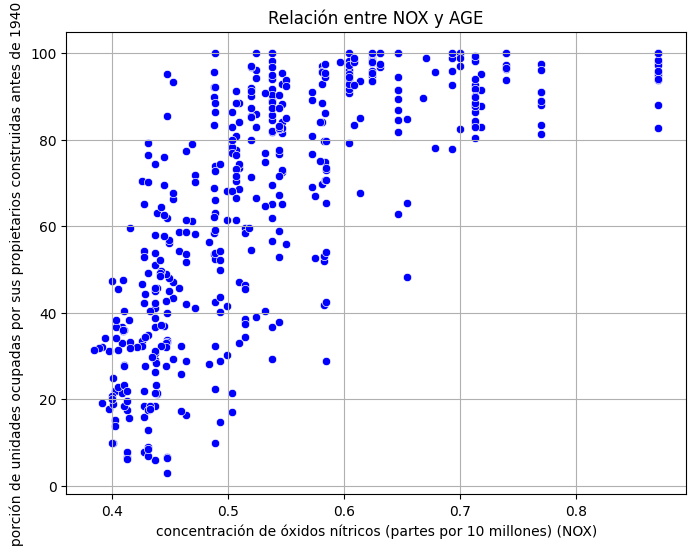

In [ ]:
# Graficar la relación entre RM y LSTAT
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='AGE', data=df, color='blue')
plt.title('Relación entre NOX y AGE')
plt.xlabel('concentración de óxidos nítricos (partes por 10 millones) (NOX)')
plt.ylabel('proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)')
plt.grid(True)
plt.show()

- **RM y LSTAT**

  Hay una fuerte concentración de puntos (Cluster) puede ser que a medida que disminuye el número de habitaciones, el porcentaje más bajo de la población aumenta o viceversa.
  

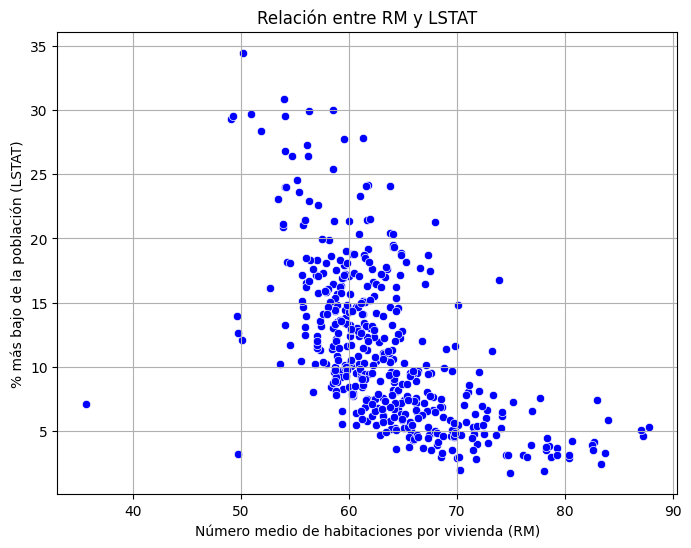

In [ ]:
# Graficar la relación entre RM y LSTAT
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RM', y='LSTAT', data=df, color='blue')
plt.title('Relación entre RM y LSTAT')
plt.xlabel('Número medio de habitaciones por vivienda (RM)')
plt.ylabel('% más bajo de la población (LSTAT)')
plt.grid(True)
plt.show()

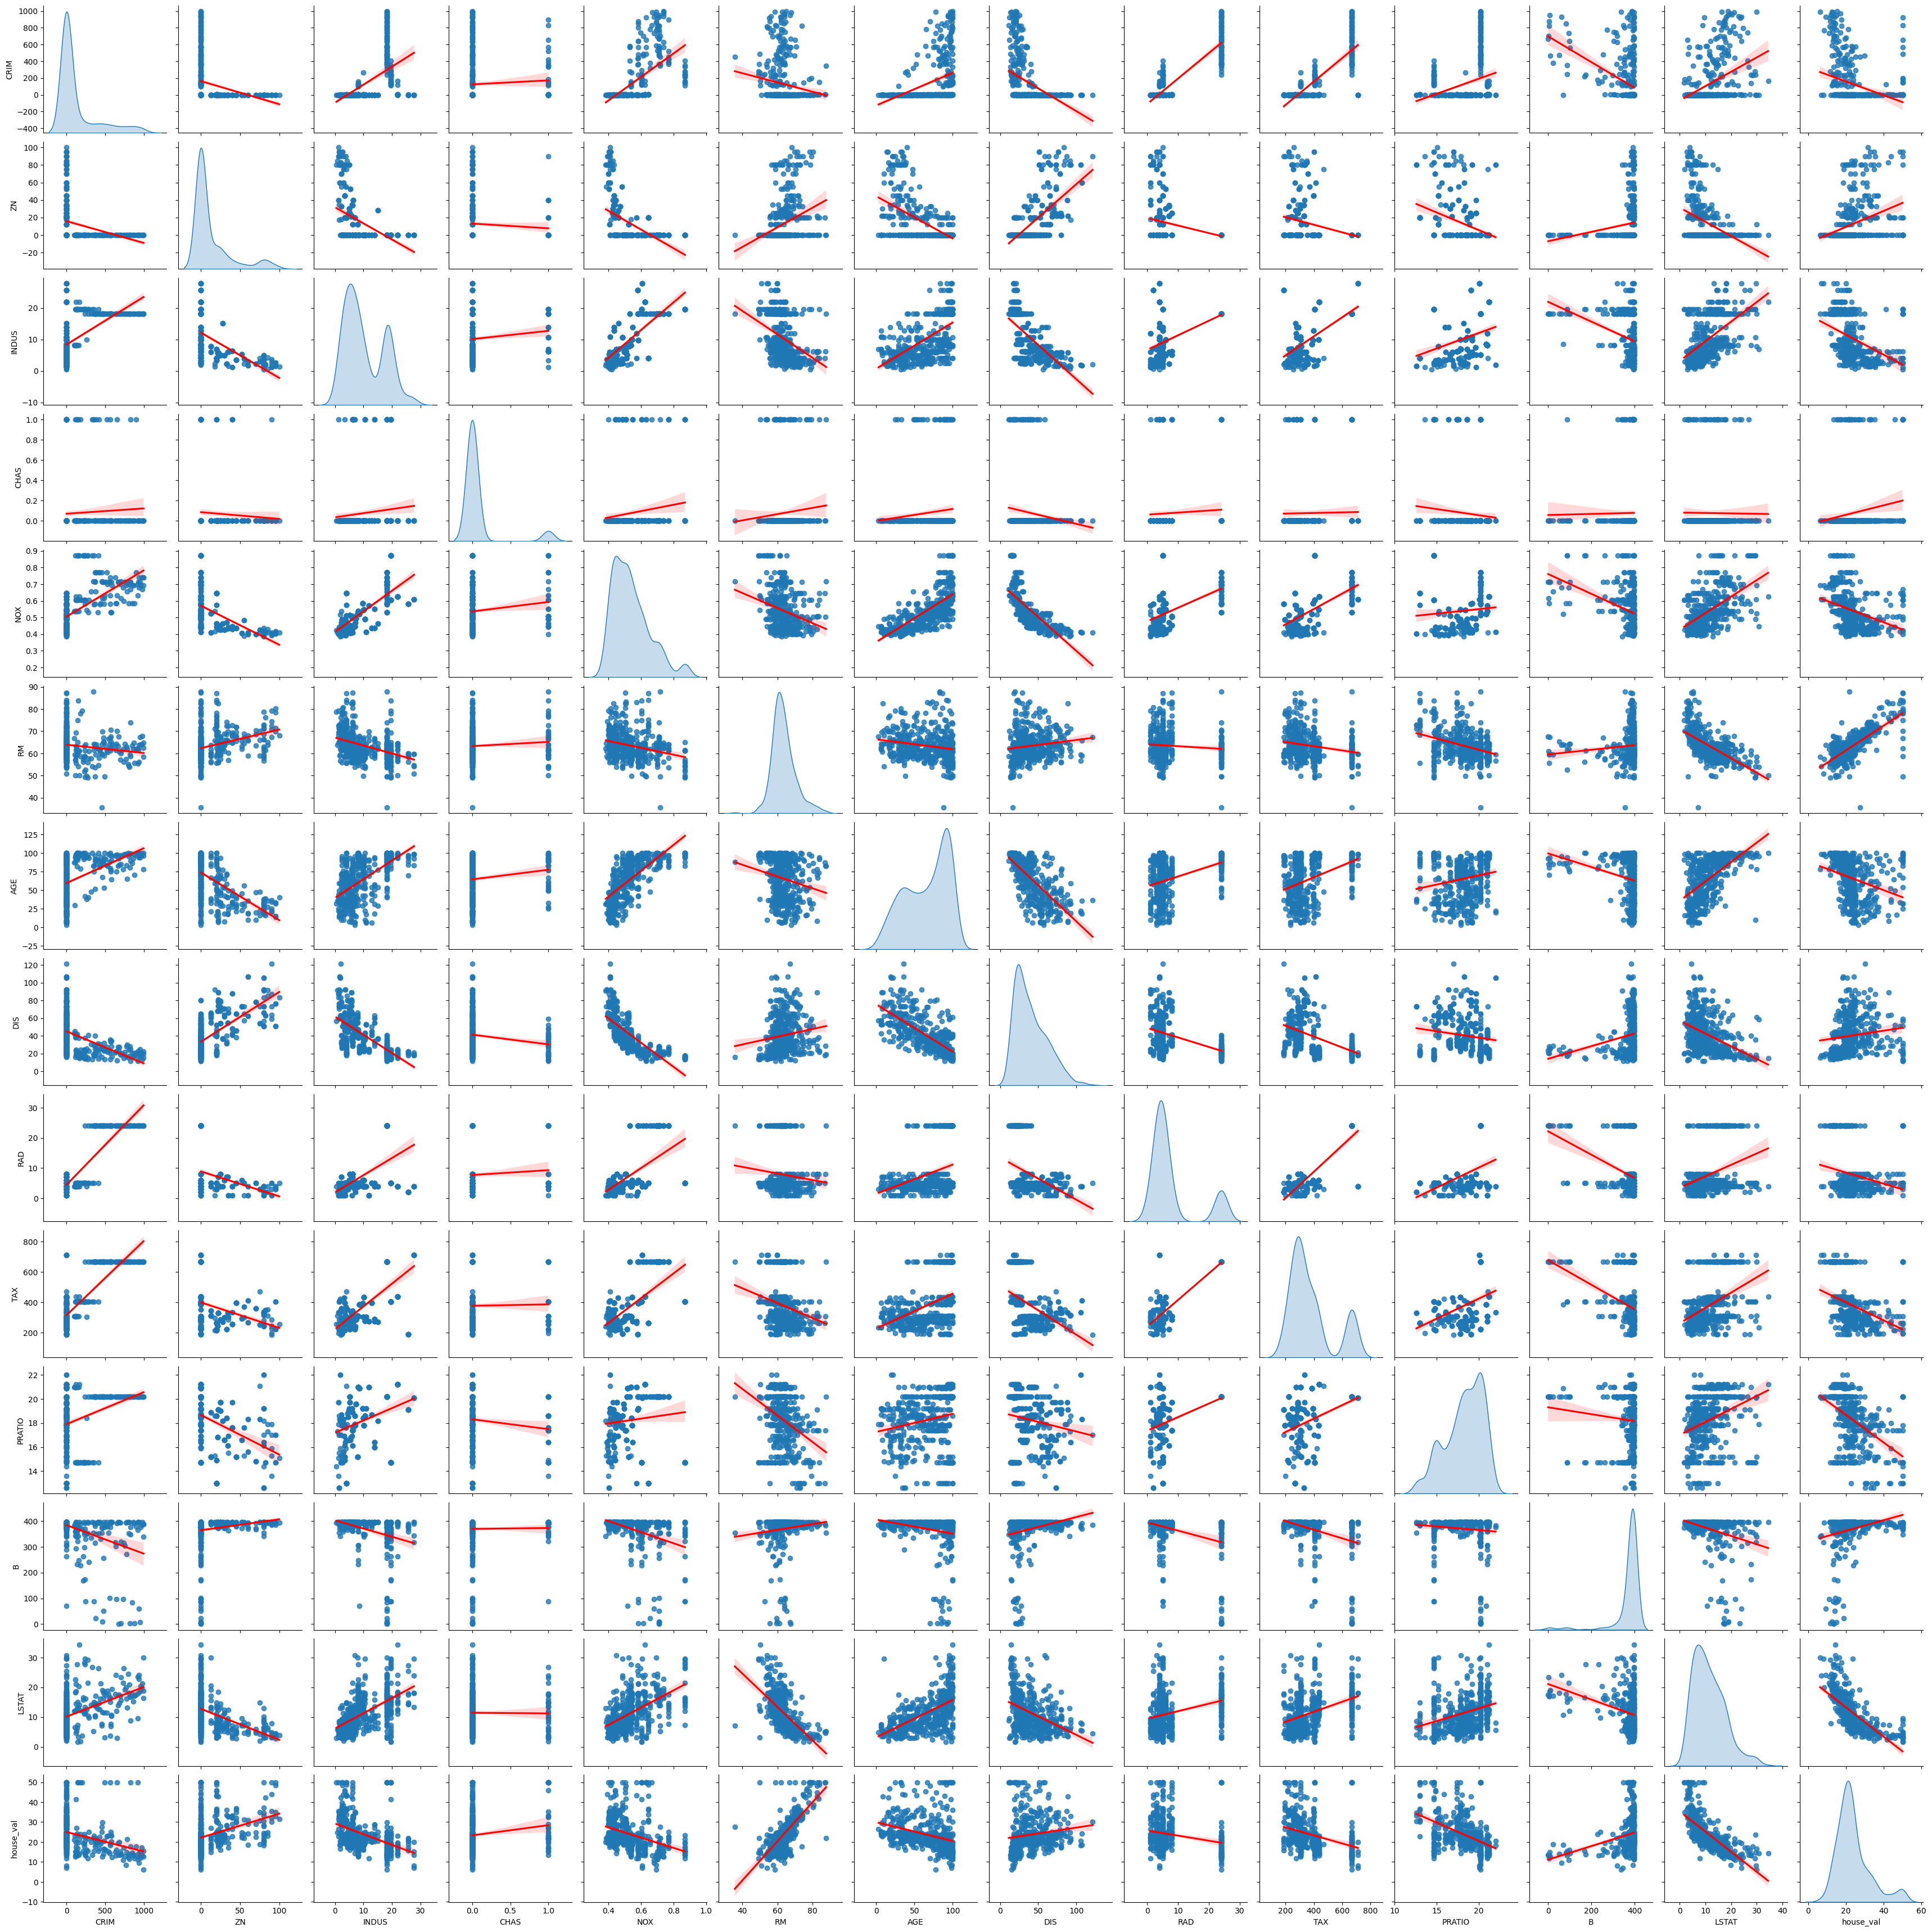

In [ ]:
  sns.pairplot(df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

## Separar conjuntos de entrenamiento y prueba
Tarea: Separar el conjunto de datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
print('Entrenamiento:', X_train.shape)
print('Prueba:', X_test.shape)

Entrenamiento: (316, 13)
Prueba: (136, 13)


## Normalizar características
Tarea: Normalizar las características para que sus valores estén en [0,1].

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.describe()

## Regresión lineal + Regularización L2
Tarea: Crear un modelo de regresión lineal para predecir precios de las casas usando la regularización L2.
Evaluar desempeño sobre el conjunto de prueba.

In [ ]:
# Entrenar el modelo
ridge_reg = Ridge(random_state=100)
params = {'alpha': np.logspace(-5, 5, 11)}
best_model = GridSearchCV(ridge_reg, params, verbose=3, n_jobs=-1, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
best_model.fit(X_train, y_train)

model = best_model.best_estimator_

print(best_model.best_score_)
print(best_model.best_params_)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE =', RMSE)
r2 = r2_score(y_test, y_pred)
print('R^2 = ', r2)

## Regresión lineal + Regularización L1
Tarea: Crear un modelo de regresión lineal para predecir precios de las casas usando la regularización L1.
Evaluar desempeño sobre el conjunto de prueba.


In [ ]:
# Entrenar el modelo
lasso_reg = Lasso(random_state=100)
params = {'alpha': np.logspace(-5, 5, 11)}
best_model = GridSearchCV(lasso_reg, params, verbose=3, n_jobs=-1, cv=10, return_train_score=True, scoring='neg_root_mean_squared_error')
best_model.fit(X_train, y_train)

model = best_model.best_estimator_

print(best_model.best_score_)
print(best_model.best_params_)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE =', RMSE)
r2 = r2_score(y_test, y_pred)
print('R^2 = ', r2)

## Árbol de decisión
Tarea: Crear un árbol de decisión para predecir precios de las casas.
Evaluar desempeño sobre el conjunto de prueba.

In [ ]:
# Entrenar el modelo
algo = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=0)

params = {'max_depth':[None, 5, 10, 20, 50],
          'min_samples_split':[2, 10, 20],
          'min_impurity_decrease':[0.0, 1e-4, 1e-3, 1e-2]}

best_model = GridSearchCV(algo, params, verbose=3, n_jobs=-1, cv=5, return_train_score=True, scoring='neg_root_mean_squared_error')
best_model.fit(X_train, y_train)

model = best_model.best_estimator_

print(best_model.best_score_)
print(best_model.best_params_)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE =', RMSE)
r2 = r2_score(y_test, y_pred)
print('R^2 = ', r2)

## Random Forest
Tarea: Crear un random forest para predecir precios de las casas.
Evaluar desempeño sobre el conjunto de prueba.

In [ ]:
# Entrenar el modelo
algo = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_features='sqrt', n_jobs=-1, random_state=10)
params = {'max_depth':[None, 10, 20],
          'min_samples_split':[2, 20],
          'min_impurity_decrease':[0.0, 1e-4, 1e-3]}

best_model = GridSearchCV(algo, params, verbose=3, n_jobs=-1, cv=5, return_train_score=True, scoring='neg_root_mean_squared_error')
best_model.fit(X_train, y_train)

model = best_model.best_estimator_

print(best_model.best_score_)
print(best_model.best_params_)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE =', RMSE)
r2 = r2_score(y_test, y_pred)
print('R^2 = ', r2)

## Red Neuronal
Tarea: Crear una red neuronal para predecir precios de las casas.
Evaluar desempeño sobre el conjunto de prueba.

In [ ]:
# Entrenar el modelo
layer_size = len(X_train.columns)
algo = MLPRegressor(max_iter=500, learning_rate='adaptive', warm_start=True, early_stopping=True, random_state=0)
params = {'hidden_layer_sizes':[(layer_size,), (layer_size,layer_size)],
          'activation': ['tanh', 'relu', 'logistic'],
          'alpha': np.logspace(-4, 4, 5)}

best_model = RandomizedSearchCV(algo, params, n_iter=20, verbose=3, n_jobs=-1, cv=5, return_train_score=True, scoring='neg_root_mean_squared_error')
best_model.fit(X_train, y_train)

model = best_model.best_estimator_

print(best_model.best_score_)
print(best_model.best_params_)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE =', RMSE)
r2 = r2_score(y_test, y_pred)
print('R^2 = ', r2)

## KNN
Tarea: Crear un modelo de KNN para predecir precios de las casas.
Evaluar desempeño sobre el conjunto de prueba.

In [ ]:
# Entrenar el modelo
algo = KNeighborsRegressor()
params = {'n_neighbors':[1, 5, 25],
          'weights':['uniform', 'distance'],
          'p':range(1, 3)}

best_model = GridSearchCV(algo, params, verbose=3, n_jobs=-1, cv=5, return_train_score=True, scoring='neg_root_mean_squared_error')
best_model.fit(X_train, y_train)

model = best_model.best_estimator_

print(best_model.best_score_)
print(best_model.best_params_)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE =', RMSE)
r2 = r2_score(y_test, y_pred)
print('R^2 = ', r2)

## Tabla De comparacion de modelos


In [ ]:
data = {
    "Modelo": [
        "Regresión lineal + Regularización L2",
        "Regresión lineal + Regularización L1",
        "Árbol de decisión",
        "Random Forest",
        "Red Neuronal",
        "KNN"
    ],
    "RMSE": [
        5.730982853557987,
        5.76175075823397,
        4.01796484308285,
        3.917756601556437,
        6.239522054178119,
        4.391491094854899
    ],
    "R²": [
        0.465610943470953,
        0.4598575960585164,
        0.7373293175516498,
        0.7502679743678904,
        0.36656510274575205,
        0.6862213786534156
    ]
}


df = pd.DataFrame(data)
df

,Modelo,RMSE,R²
0,Regresión lineal + Regularización L2,5.730983,0.465611
1,Regresión lineal + Regularización L1,5.761751,0.459858
2,Árbol de decisión,4.017965,0.737329
3,Random Forest,3.917757,0.750268
4,Red Neuronal,6.239522,0.366565
5,KNN,4.391491,0.686221


El modelo de Random Forest es el mejor modelo basado en estos resultados, ya que tiene el RMSE más bajo y el R² más alto. Esto indica que Random Forest tiene el menor error de predicción y explica mejor la variabilidad de los datos en comparación con los otros modelos.